# 匯入模組

In [1]:
import numpy as np
import matplotlib.pyplot as plt #畫圖工具
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 用pandas觀察table

In [2]:
import pandas as pd 
df = pd.read_csv('functionTestData.csv')  
df

,Position,Level,Salary
0,Business Analysis,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# 將data資料讀近來並轉呈ndarray的屬性

In [3]:
data = np.genfromtxt("functionTestData.csv",delimiter=",")
print(type(data))

<class 'numpy.ndarray'>


In [4]:
x_data = data[1:,1] #所有的列、第1行
x_data #數據是一維的，所以底下要做數據轉換

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [5]:
y_data = data[1:,2]
y_data

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

# 利用散佈圖觀察數據

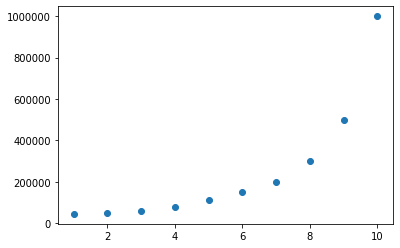

In [6]:
plt.scatter(x_data,y_data)
plt.show()

# 做數據轉換，從一維轉成二維

In [7]:
x_data = x_data[:,np.newaxis] #np.newaxis加上一個維度的意思
y_data = y_data[:,np.newaxis]

In [8]:
x_data

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [9]:
y_data

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

# 利用線性回歸預測線條

In [10]:
model = LinearRegression()

In [11]:
model.fit(x_data , y_data) #傳入的數據必須是二維的格式，代表每一列必須是一個數據

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

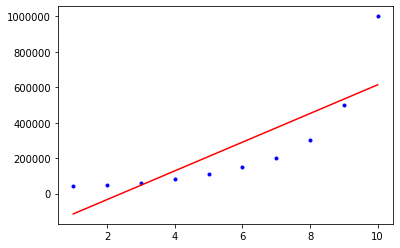

In [12]:
plt.plot(x_data,y_data,'b.')
plt.plot(x_data,model.predict(x_data),'r')
plt.show()

# 用多項式

In [13]:
poly_reg = PolynomialFeatures(degree=3) #原本只有一個特徵，幫我們生成多項式的特徵

In [14]:
x_poly = poly_reg.fit_transform(x_data)

In [15]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

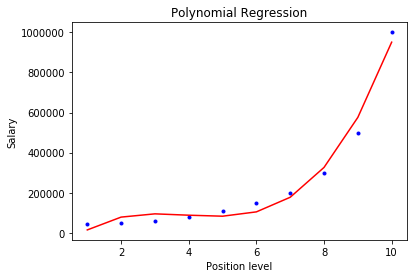

In [17]:
plt.plot(x_data,y_data,'b.')
plt.plot(x_data,lin_reg.predict(poly_reg.fit_transform(x_data)),c='r') #lin_reg.predict(x_poly)做了預測後的值-y值
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# 較平滑的曲線

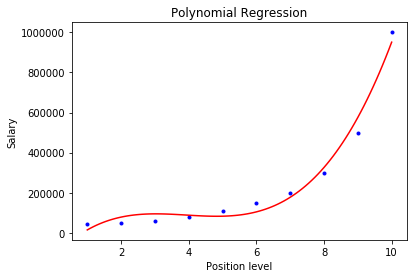

In [25]:
plt.plot(x_data,y_data,'b.')
x_test = np.linspace(1,10,100) # 一維格式
x_test = x_test[:,np.newaxis]  #二維格式
plt.plot(x_test,lin_reg.predict(poly_reg.fit_transform(x_test)),c='r') #lin_reg.predict(x_poly)做了預測後的值
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()